In [122]:
import numpy as np
from matplotlib.pylab import matshow
import matplotlib.pyplot as plt
import random

In [123]:
a = [[(0,0,0) for i in range(256)] for j in range(256)]

In [124]:
a = np.array(a)

In [110]:

for i in range(25):

    arr = generate_polygonal_wall_points(int(50+150*random.random()),int(50+150*random.random()),int(25*random.random()),int(25+50*random.random()))

    for (x,y) in arr:
        a[x][y] = [255,255,255]

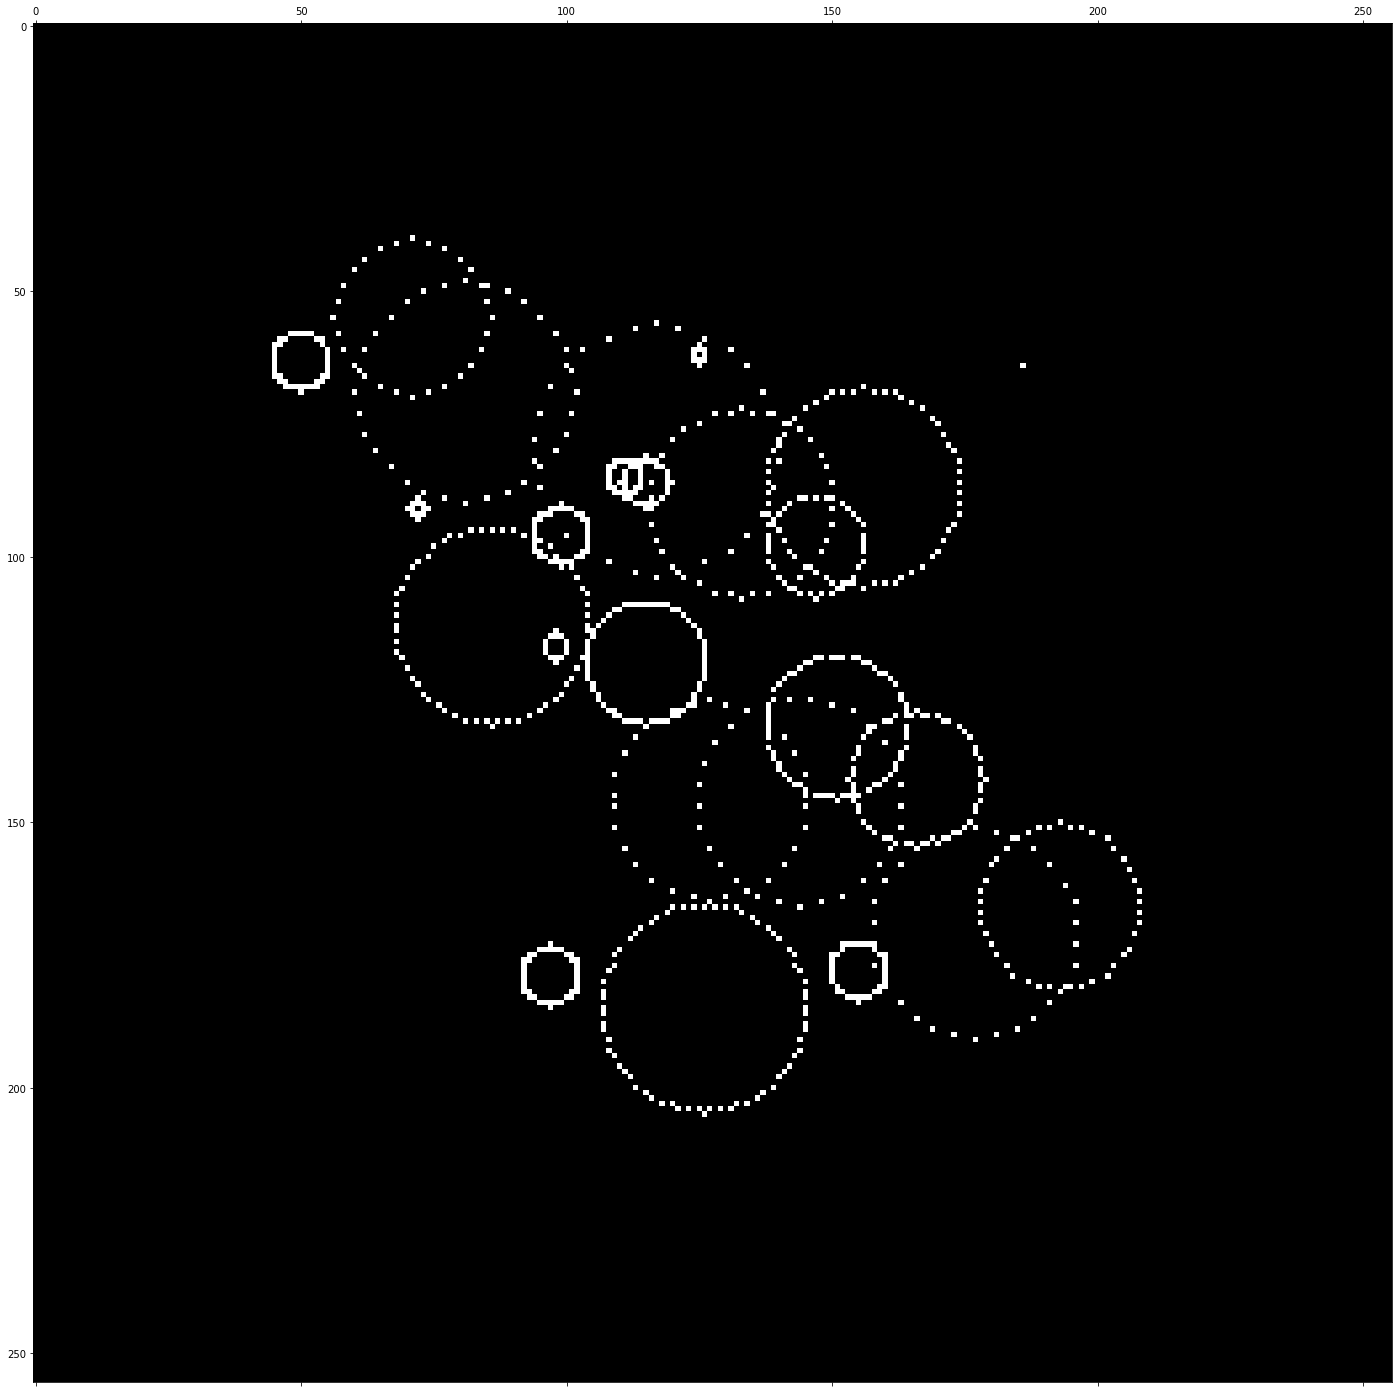

In [111]:
fig, ax = plt.subplots(1,1,facecolor = "white", figsize = (25,25))

ax.matshow(a)

In [ ]:
def connect2(ends):
    d0, d1 = np.diff(ends, axis=0)[0]
    if np.abs(d0) > np.abs(d1): 
        return np.c_[np.arange(ends[0, 0], ends[1,0] + np.sign(d0), np.sign(d0), dtype=np.int32),
                     np.arange(ends[0, 1] * np.abs(d0) + np.abs(d0)//2,
                               ends[0, 1] * np.abs(d0) + np.abs(d0)//2 + (np.abs(d0)+1) * d1, d1, dtype=np.int32) // np.abs(d0)]
    else:
        return np.c_[np.arange(ends[0, 0] * np.abs(d1) + np.abs(d1)//2,
                               ends[0, 0] * np.abs(d1) + np.abs(d1)//2 + (np.abs(d1)+1) * d0, d0, dtype=np.int32) // np.abs(d1),
                     np.arange(ends[0, 1], ends[1,1] + np.sign(d1), np.sign(d1), dtype=np.int32)]


In [64]:
def connect_points(point_list):
    returned_points = []

    for i, (x, y) in enumerate(point_list):
        next_point = [point_list[(i+1)%len(point_list)][0],point_list[(i+1)%len(point_list)][1]]
        new_points = connect2(np.array([x,y], next_point))
        returned_points.append(new_points)  
    
    return returned_points

def generate_polygonal_wall_points(x,y,corner_points, radius):
    points = []
    angles = np.array(list(range(corner_points)))*(2*np.pi)/corner_points
    
    for i, angle in enumerate(angles):
        px = np.cos(angle)*radius
        py = np.sin(angle)*radius
        px = int(px)
        py = int(py)
        points.append([x+px, y+py])
    
    return points

In [129]:

from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo

[<BuildingInfo.RUINS: (345, -1, -1, 16393, True)>,
 <BuildingInfo.AACHEN_CATHEDRAL: (1622, 37, 1517, 16182, False)>,
 <BuildingInfo.AMPHITHEATRE: (251, 58, 1514, 16572, False)>,
 <BuildingInfo.AQUEDUCT: (231, 52, 1522, 16201, False)>,
 <BuildingInfo.ARCH_OF_CONSTANTINE: (899, 37, 1485, 16572, False)>,
 <BuildingInfo.ARCHERY_RANGE: (87, 0, 1415, 16128, False)>,
 <BuildingInfo.ARMY_TENT_A: (1196, 76, 1467, 16521, False)>,
 <BuildingInfo.ARMY_TENT_B: (1197, 76, 1468, 16521, False)>,
 <BuildingInfo.ARMY_TENT_C: (1198, 77, 1469, 16522, False)>,
 <BuildingInfo.ARMY_TENT_D: (1199, 77, 1470, 16523, False)>,
 <BuildingInfo.ARMY_TENT_E: (1200, 77, 1471, 16522, False)>,
 <BuildingInfo.BARRACKS: (12, 2, 1402, 16135, False)>,
 <BuildingInfo.BLACKSMITH: (103, 4, 1419, 16131, False)>,
 <BuildingInfo.BOMBARD_TOWER: (236, 42, 1439, 16156, False)>,
 <BuildingInfo.BRIDGE_A_BOTTOM: (607, -1, 144, 16513, False)>,
 <BuildingInfo.BRIDGE_A_BROKEN_BOTTOM: (740, -1, 144, 16643, False)>,
 <BuildingInfo.BRIDGE_A_